In [1]:
import queue
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- `JID`: integer number representing the identifier of a job
- `TID`: an integer number between 0 and nj, representing the identifier of tasks belonging to job j
- `ta`: arrival time of task measured in milliseconds
- `C`: running time in seconds required to run the task on a Google Normalized Computing Unit (GNCU)
- `M`: amount of memory required to run the task, expressed in Google Normalized Memory Unit (GNMU)
- `N`: number of servers
- `X = C/µ`: service time of a task
- `1 GNMU`: amount of memory of a server
- `µ`: processing power expressed in `GNCU`

In [2]:
# Import data.
data = pd.read_csv('Cell_a.csv')

# Check if we import all the rows.
if data.shape[0] == 2329133:
    print('All rows correctly imported! \U0001f44d')

All rows correctly imported! 👍


In [3]:
data = data.rename(columns={'Job_ID': 'JID',
                            'Task_ID': 'TID',
                            'Arrival_Time': 't_a',
                            'CPU': 'C',
                            'Memory': 'M'})
data = data.sort_values('t_a')
data.head()

,JID,TID,t_a,C,M
0,375000667413,0,603026300,0.041851,0.001169
1,375000669289,0,606413041,0.024968,0.001179
2,375000670586,0,608994453,0.024176,0.001173
3,375000670588,0,608994466,0.019552,0.001163
4,375000670590,0,609042903,0.028044,0.001179


In [72]:
pd.DataFrame(data.groupby('JID').count().TID)

,TID
JID,
375000667413,1
375000669289,1
375000670586,1
375000670588,1
375000670590,1
...,...
400465207745,1
400465219425,2
400465256347,1


### Data exploration and visualization

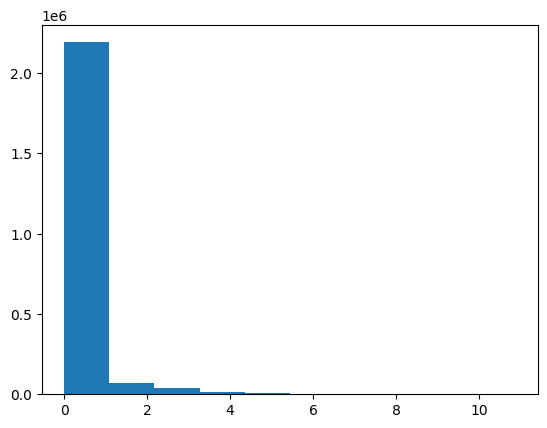

In [73]:
plt.hist(np.log(data.C+1));

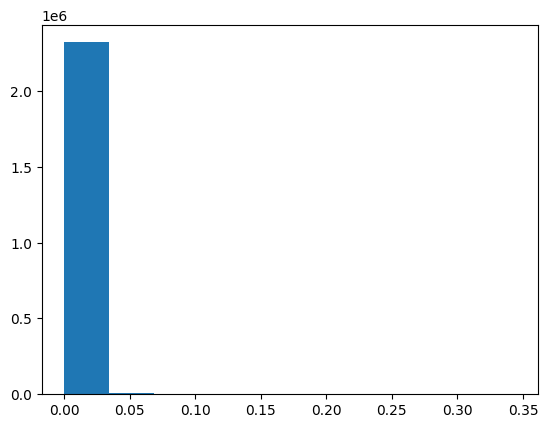

In [74]:
plt.hist(np.log(data.M+1));

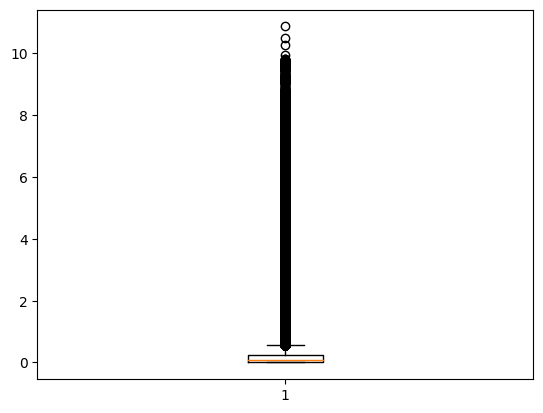

In [75]:
plt.boxplot(np.log(data.C+1));

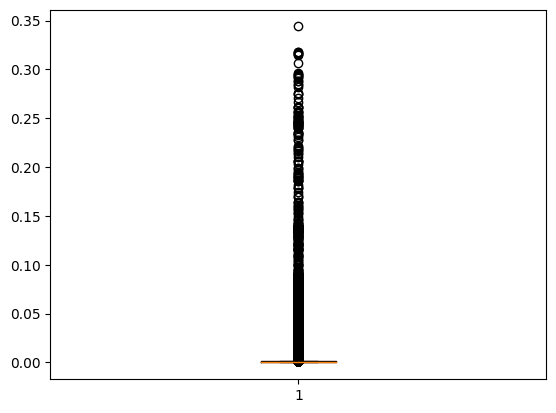

In [76]:
plt.boxplot(np.log(data.M+1));

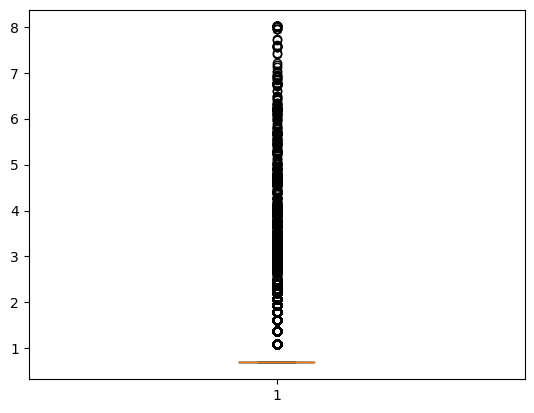

In [77]:
freq = pd.DataFrame(data.groupby('JID').count().TID)
plt.boxplot(np.log(freq+1));

In [78]:
print(data.M.describe())
print(data.C.describe())

count    2.329133e+06
mean     1.497997e-03
std      5.076826e-03
min      0.000000e+00
25%      5.397797e-04
50%      8.687973e-04
75%      1.123428e-03
max      4.106445e-01
Name: M, dtype: float64
count    2.329133e+06
mean     3.962583e+00
std      1.357256e+02
min      0.000000e+00
25%      2.649117e-02
50%      7.241821e-02
75%      2.701645e-01
max      5.278707e+04
Name: C, dtype: float64


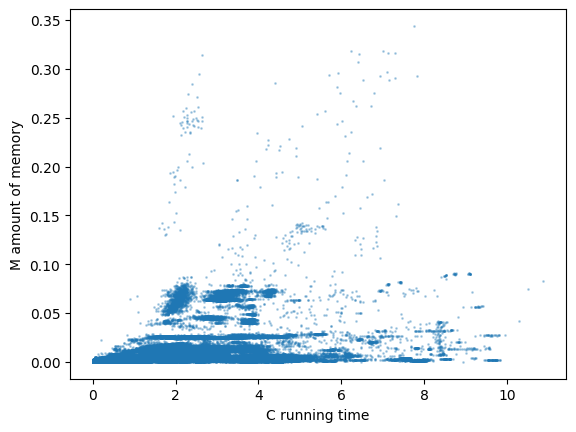

In [79]:
plt.scatter(np.log(data.C+1), np.log(data.M+1), s=1, alpha=0.3)
plt.xlabel('C running time')
plt.ylabel('M amount of memory');

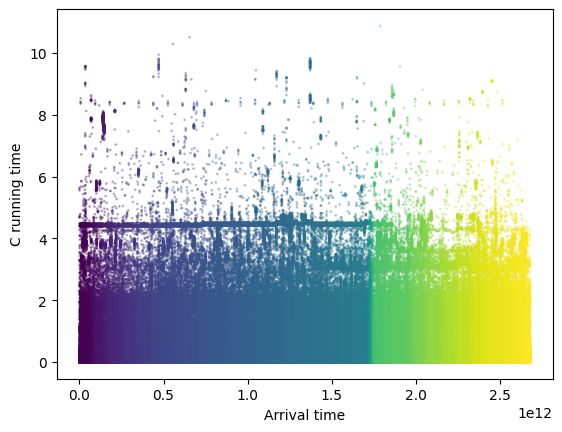

In [80]:
plt.scatter(data.t_a, np.log(data.C+1), c=data.JID, s=1, alpha=0.3)
plt.xlabel('Arrival time')
plt.ylabel('C running time');

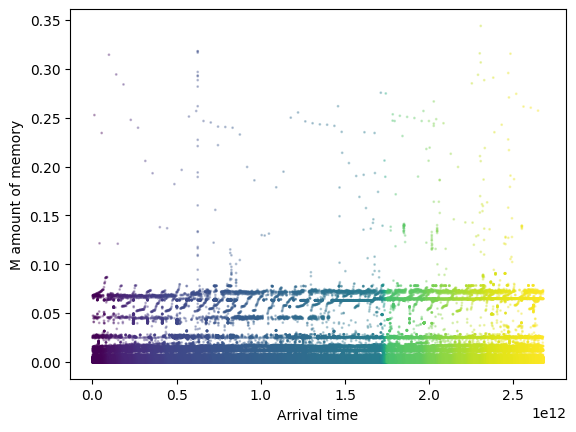

In [81]:
plt.scatter(data.t_a, np.log(data.M+1), c=data.JID, s=1, alpha=0.3)
plt.xlabel('Arrival time')
plt.ylabel('M amount of memory');

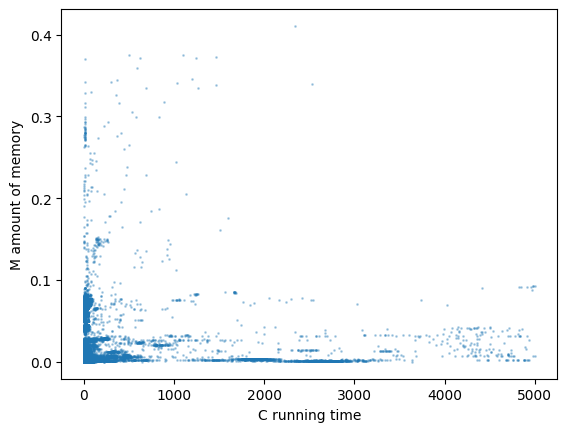

In [82]:
plt.scatter(data.loc[data.C<5000].C, data.loc[data.C<5000].M, s=1, alpha=0.3)
plt.xlabel('C running time')
plt.ylabel('M amount of memory');

### Set parameters

In [6]:
N = 64
mu = 0.1

The purpose of the challenge is to define a dispatching
algorithm and scheduling algorithms, one for each server, so
as to get the best possible mean job response time.

### Baseline algorithm

Baseline: `LWL` & `FCFS` 

In [4]:
class Task:

    def __init__(self, job_id, task_id, ta, C, M):

        global mu

        self.jid = job_id
        self.tid = task_id
        self.ta = ta
        self.C = C
        self.M = M
        self.X = C / mu
        self.processing = False
        self.total_time = 0



class Server:

    def __init__(self, server_id):
        self.server_id = server_id
        self.workload = 0
        self.M = 0
        self.queue = queue.PriorityQueue()

    def assign_task_to_server(self, task):
        #[TODO] try compute workload with C
        
        # SCHEDULING (FCFS)
        self.queue.put((task.ta, task))
        self.workload += task.M


    def process_tasks(self):
        while self.M < 1:
            if not self.queue.empty():
                if self.M + self.queue.queue[0][1].M < 1:
                    self.M += self.queue.queue[0][1].M

In [51]:
def LWL(task, servers):
    
    min_workload = float('inf')
    selected_server = None

    for server in servers.values():
        if server.workload < min_workload:
            min_workload = server.workload
            selected_server = server

    selected_server.assign_task_to_server(task)

In [50]:
servers = {i: Server(i) for i in range(N)}

tasks = {}
for index, row in data.loc[0:1000].iterrows():
    jid, tid, ta, C, M = row.values
    tasks[index] = Task(jid, tid, float(ta), float(C), float(M))


In [22]:
# a = Task(3, 1, 0.001, .3, .4)

# ss = Server(123)

# ss.assign_task_to_server(a)
# ss.process_tasks()

In [52]:
for el in tasks.values():
    LWL(el, servers)

### Our algorithms

In [ ]:
# Use priority queue

Our scheduling algorithms (`LAS`)

###  Performance evaluation

Values of $\bar{R}$, $\bar{S}$, $\rho$, $\bar{L}$

Where:

- $R$ (job response time) $\longrightarrow$ time elapsing since the arrival of the first arriving task of a job until all tasks belonging to that job have been fully served

- $S$ (job slowdown) $\longrightarrow$ ratio of response time of the job to the sum of service times of all tasks belonging to the job

- $\rho_k$ (utilization coefficient of server $k$) $\longrightarrow$ fraction of time that the server k is busy serving tasks

- $L$ (messaging load) $\longrightarrow$ number of messages exchanged between the dispatcher and servers for a given task dispatching

Table with values of $\rho_k$, with $k=1, ..., 64$

Plot of the empirical Complementary Cumulative Distribution Function (eCCDF) of $R$ and $S$.

Repeating the above performance evaluation for: 

- our algorithms

- baseline algorithms (for comparison purposes), namely, **LWL dispatching** and **FCFS scheduling** in all servers.